In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

from skopt.optimizer import gp_minimize
from skopt.space import Real, Categorical, Integer

from bcnf.simulation.physics import get_data
from bcnf.models.cnf import CondRealNVP
from bcnf.models.feature_network import FullyConnectedFeatureNetwork
from bcnf.train.train import train_CondRealNVP
from bcnf.eval.crossvalidate import cross_validate
from bcnf.utils import partconv1d, get_gaussian_kernel

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

In [2]:
np.int = np.int64

In [ ]:
X, y = get_data(
    T=5.0,
    dt=0.1,
    N=10_000,
    break_on_impact=False
)

X_tensor = torch.Tensor(X.reshape(X.shape[0], -1))
y_tensor = torch.Tensor(y)

print(f'{X_tensor.shape=}, {y_tensor.shape=}')

In [ ]:
condition_size = 1024

model_kwargs = {
    "size": y_tensor.shape[1],
    "hidden_size": 64,
    "n_blocks": 32,
    "n_conditions": condition_size,
    "act_norm": True,
}

feature_network_kwargs = {
    "input_size": X_tensor.shape[1],
    "hidden_sizes": [1024] * 5,
    "output_size": condition_size,
    "dropout": 0.5,
}

optimizer_kwargs = {
    "lr": 1e-3
}

lr_scheduler_kwargs = {
    "mode": "min",
    "factor": 0.5,
    "patience": 50,
}

In [3]:
# Example search spaces
search_spaces = {
    'n_estimators': Integer(1, 10),
    'max_depth': Integer(1, 100),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 10),
    'bootstrap': Categorical([True, False]),
}

# Load dataset for demonstration
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Define a filename to save the optimizer state
filename = 'bayes_search_cv_optimizer.joblib'

In [5]:
# Define the scoring function
def scoring_function(params):
    # TODO: implement Cross-Validation here
    model = RandomForestRegressor(
        n_estimators=params[0],
        max_depth=params[1],
        min_samples_split=params[2],
        min_samples_leaf=params[3],
        bootstrap=params[4]
    )
    model.fit(X_train, y_train)
    return -model.score(X_test, y_test)

In [6]:
result = gp_minimize(
    func=scoring_function,
    dimensions=search_spaces.values(),
    n_initial_points=10,
    n_calls=100,
    random_state=42,
    verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0727
Function value obtained: -0.6684
Current minimum: -0.6684
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0145
Function value obtained: -0.6984
Current minimum: -0.6984
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0144
Function value obtained: -0.6288
Current minimum: -0.6984
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0474
Function value obtained: -0.7866
Current minimum: -0.7866
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0316
Function value obtained: -0.5765
Current minimum: -0.7866
Iteration No: 6 started. 

/home/psaegert/miniconda3/envs/bcnf/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 56 ended. Search finished for the next optimal point.
Time taken: 0.3677
Function value obtained: -0.7690
Current minimum: -0.8327
Iteration No: 57 started. Searching for the next optimal point.
Iteration No: 57 ended. Search finished for the next optimal point.
Time taken: 0.3610
Function value obtained: -0.7783
Current minimum: -0.8327
Iteration No: 58 started. Searching for the next optimal point.
Iteration No: 58 ended. Search finished for the next optimal point.
Time taken: 0.4004
Function value obtained: -0.7147
Current minimum: -0.8327
Iteration No: 59 started. Searching for the next optimal point.
Iteration No: 59 ended. Search finished for the next optimal point.
Time taken: 0.3761
Function value obtained: -0.7853
Current minimum: -0.8327
Iteration No: 60 started. Searching for the next optimal point.
Iteration No: 60 ended. Search finished for the next optimal point.
Time taken: 0.4063
Function value obtained: -0.7377
Current minimum: -0.8327
Iteration No: 61 st

/home/psaegert/miniconda3/envs/bcnf/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 91 ended. Search finished for the next optimal point.
Time taken: 0.6905
Function value obtained: -0.7984
Current minimum: -0.8327
Iteration No: 92 started. Searching for the next optimal point.
Iteration No: 92 ended. Search finished for the next optimal point.
Time taken: 0.6961
Function value obtained: -0.7872
Current minimum: -0.8327
Iteration No: 93 started. Searching for the next optimal point.
Iteration No: 93 ended. Search finished for the next optimal point.
Time taken: 0.5904
Function value obtained: -0.7288
Current minimum: -0.8327
Iteration No: 94 started. Searching for the next optimal point.
Iteration No: 94 ended. Search finished for the next optimal point.
Time taken: 0.6462
Function value obtained: -0.8228
Current minimum: -0.8327
Iteration No: 95 started. Searching for the next optimal point.
Iteration No: 95 ended. Search finished for the next optimal point.
Time taken: 0.8079
Function value obtained: -0.7868
Current minimum: -0.8327
Iteration No: 96 st

/home/psaegert/miniconda3/envs/bcnf/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 97 ended. Search finished for the next optimal point.
Time taken: 0.7671
Function value obtained: -0.7793
Current minimum: -0.8327
Iteration No: 98 started. Searching for the next optimal point.
Iteration No: 98 ended. Search finished for the next optimal point.
Time taken: 0.7824
Function value obtained: -0.7983
Current minimum: -0.8327
Iteration No: 99 started. Searching for the next optimal point.
Iteration No: 99 ended. Search finished for the next optimal point.
Time taken: 0.7618
Function value obtained: -0.8099
Current minimum: -0.8327
Iteration No: 100 started. Searching for the next optimal point.
Iteration No: 100 ended. Search finished for the next optimal point.
Time taken: 0.7250
Function value obtained: -0.6723
Current minimum: -0.8327


In [7]:
import matplotlib.pyplot as plt

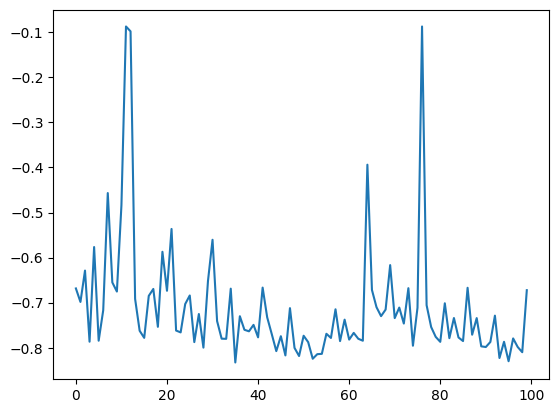

In [8]:
plt.plot(result.func_vals)